# Convolution Test

The goal of this notebook is to ensure that the convolution operation can be accurately executed on input images. The convolution kernel values will be restricted to positive integers 

In [1]:
from cryptosystem import *
from utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

In [2]:
# Testing the fastPowering_matrixBaseAndExponent function
g = np.array([[2, 3], [1, 5]]).astype(np.uint64)
A = np.array([[2, 3], [100, 2]]).astype(np.uint64)
fastPowering_matrixBaseAndExponent(g, A, 100)

array([[ 4, 27],
       [ 1, 25]], dtype=uint64)

In [3]:
# Testing the inner product function
encryptedInnerProduct(np.array([[2, 3], [1, 5]]).astype(np.uint64), np.array([[2, 3], [100, 2]]).astype(np.uint64))

2700

In [4]:
# Normal Convolution
testImage = np.array([[0, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0]]).astype(np.uint64)
testKernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]).astype(np.uint64)
testOutput = convolve2D(testImage, testKernel)
print(testOutput)

[[1. 4. 3. 4. 1.]
 [1. 2. 4. 3. 3.]
 [1. 2. 3. 4. 1.]
 [1. 3. 3. 1. 1.]
 [3. 3. 1. 1. 0.]]


In [5]:
# Encrypted Convolution
encryptedTestImage = encryptImage(testImage)
encryptedTestOutput = encryptedConvolve2D(encryptedTestImage, testKernel)
decryptedTestOutput = decryptImage(encryptedTestOutput)

decryptedTestOutput

array([[1, 4, 3, 4, 1],
       [1, 2, 4, 3, 3],
       [1, 2, 3, 4, 1],
       [1, 3, 3, 1, 1],
       [3, 3, 1, 1, 0]], dtype=uint64)

### Notice that the output results are identical; the convolution operation works in the encrypted domain!
### Let's test on an actual image

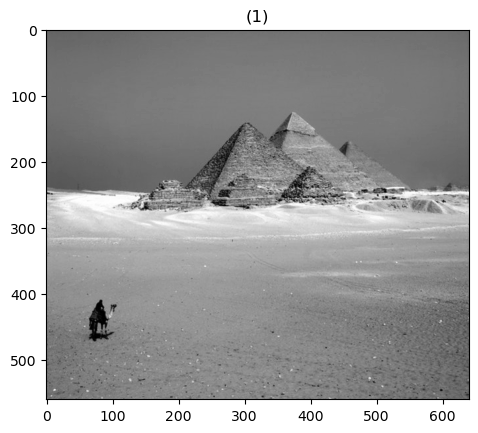

In [6]:
# Preparing the test image
pyramids = io.imread("pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(np.uint64)
grayscale_pyramids = grayscale_pyramids[400:, :]
show_images([grayscale_pyramids])

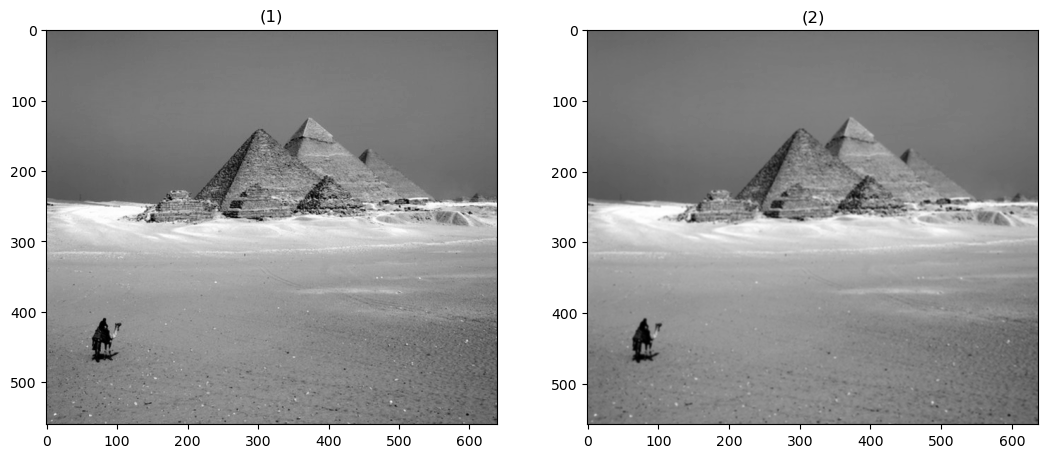

In [7]:
# Normal Convolution
testKernel = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])
testOutput = convolve2D(grayscale_pyramids, testKernel)
show_images([grayscale_pyramids, testOutput])

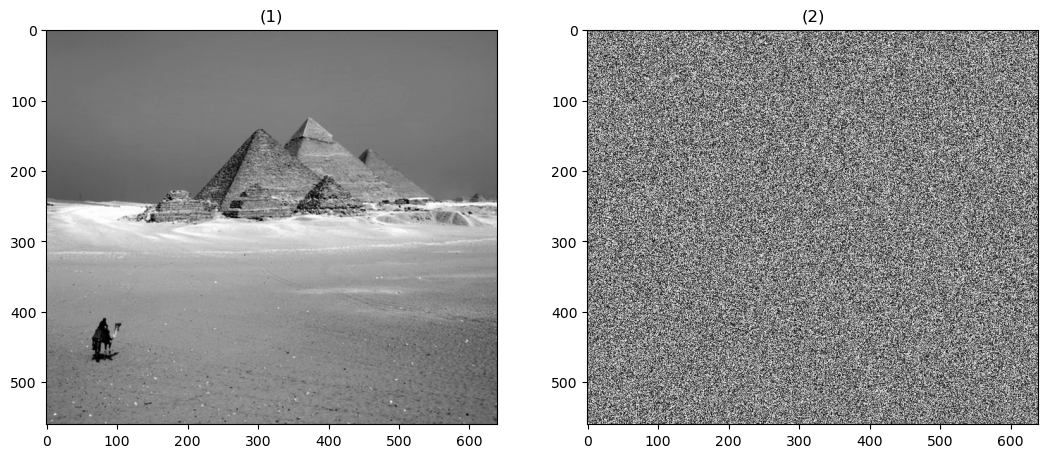

In [8]:
# Encrypt the image
encryptedPyramids = encryptImage(grayscale_pyramids)
show_images([grayscale_pyramids, encryptedPyramids])

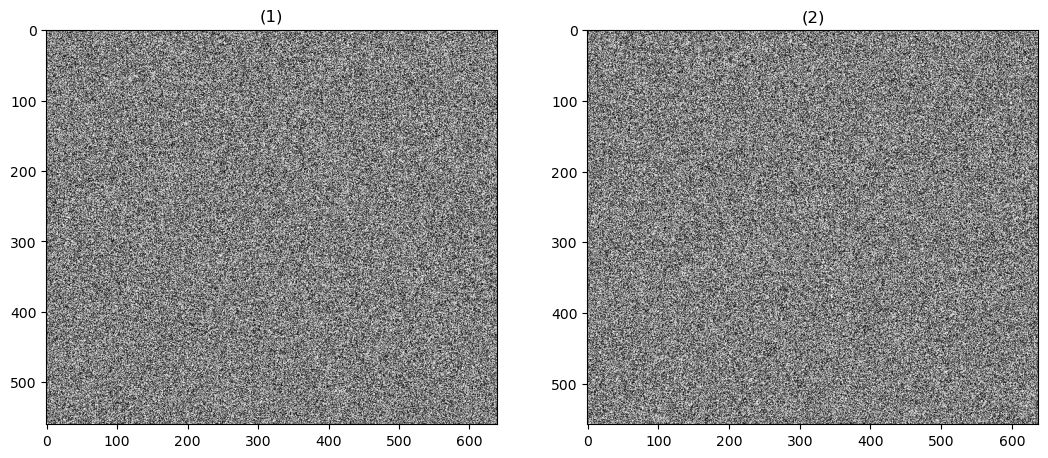

In [9]:
# Encrypted Convolution
encryptedOutput = encryptedConvolve2D(encryptedPyramids, testKernel)
show_images([encryptedPyramids, encryptedOutput])

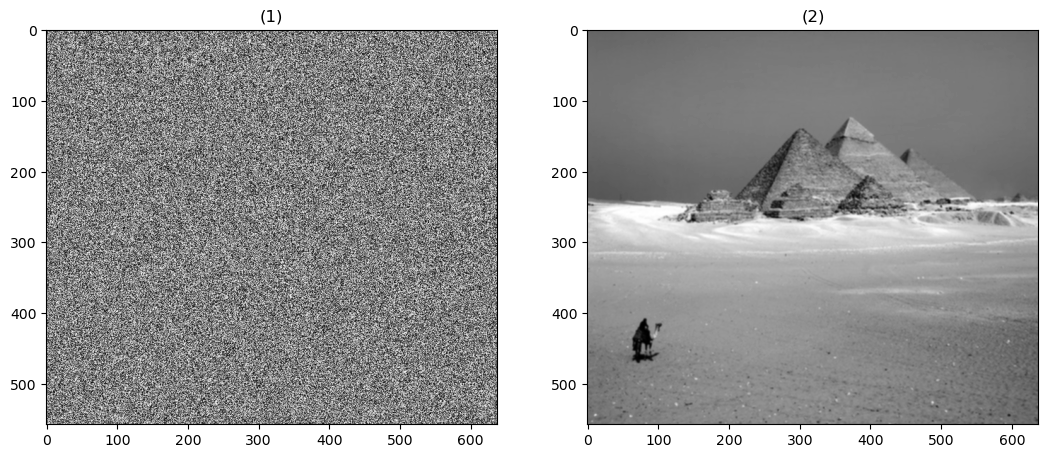

In [10]:
# Decrypt the results
decryptedOutput = decryptImage(encryptedOutput)
show_images([encryptedOutput, decryptedOutput])

In [11]:
# Make sure that the output in the plaintext domain and the decrypted output from the encrypted domain are equal.
np.sum(np.not_equal(testOutput.astype(np.uint64), decryptedOutput.astype(np.uint64)))

0

### As we can see, convolution was executed successfully in the encrypted domain.
### Try out different images and filters!